In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lectura del Dataset
data = pd.read_csv("../data/iflow_data.csv")

In [4]:
data.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


In [5]:
data.tail()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
27479,183140,CASTILLO 767,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,2.00,10.800,2,2024-08-01 12:52:00.000,2024-08-01 12:52:00.000,2024-08-01 15:51:49.000,2024-08-01 15:56:37.000
27480,183141,ARENALES 2699,CAPITAL FEDERAL,901,1401,-34.592476,-58.404052,20,7,2.00,13.000,2,2024-07-31 12:30:00.000,2024-07-31 12:30:00.000,2024-07-31 12:24:53.000,2024-07-31 12:25:53.000
27481,183274,OLAZABAL 2572,CAPITAL,901,1401,-34.561181,-58.459866,70,7,2.15,8.243,29,2024-08-01 12:10:00.000,2024-08-01 12:10:00.000,2024-08-01 13:09:13.000,2024-08-01 13:22:13.000
27482,183276,GUAMINI 2121,CAPITAL FEDERAL,901,1401,-34.661128,-58.511529,20,7,3.00,26.000,3,2024-08-01 12:20:00.000,2024-08-01 12:20:00.000,2024-08-01 13:26:20.000,2024-08-01 13:34:32.000
27483,183277,AV. CALLAO 453,CAPITAL FEDERAL,901,1401,-34.603752,-58.392250,20,7,2.00,11.900,2,2024-08-01 12:19:00.000,2024-08-01 12:19:00.000,2024-08-01 10:34:29.000,2024-08-01 10:42:49.000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iddomicilioorden         27484 non-null  int64  
 1   direccion                27484 non-null  object 
 2   localidad                27484 non-null  object 
 3   InicioHorario1           27484 non-null  int64  
 4   FinHorario1              27484 non-null  int64  
 5   latitud                  27443 non-null  float64
 6   longitud                 27443 non-null  float64
 7   cliente                  27484 non-null  int64  
 8   mes                      27484 non-null  int64  
 9   Bultos                   27484 non-null  float64
 10  Peso                     27484 non-null  float64
 11  Unidades                 27484 non-null  int64  
 12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal      

Deberian ser de tipo fecha
```
12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal         27432 non-null  object 
 15  FinVisitaReal            27432 non-null  object 
```

In [7]:
# Revisar Duplicados por columna
data.nunique()

iddomicilioorden            6593
direccion                   6072
localidad                     44
InicioHorario1                 3
FinHorario1                    3
latitud                     5887
longitud                    5891
cliente                        2
mes                            3
Bultos                      2391
Peso                        8027
Unidades                     377
InicioVisitaPlanificado     6797
FinVisitaPlanificado        6797
InicioVisitaReal           16357
FinVisitaReal              16309
dtype: int64

In [8]:
# Cantidad de valores faltantes por columna
data.isnull().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    41
longitud                   41
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

In [9]:
# Porcentaje de valores faltantes por columna
(data.isnull().sum()/(len(data)))*100

iddomicilioorden           0.000000
direccion                  0.000000
localidad                  0.000000
InicioHorario1             0.000000
FinHorario1                0.000000
latitud                    0.149178
longitud                   0.149178
cliente                    0.000000
mes                        0.000000
Bultos                     0.000000
Peso                       0.000000
Unidades                   0.000000
InicioVisitaPlanificado    0.000000
FinVisitaPlanificado       0.000000
InicioVisitaReal           0.189201
FinVisitaReal              0.189201
dtype: float64

In [10]:
print(data.mes.unique())

[5 6 7]


In [11]:
print(data.cliente.nunique())

2


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
iddomicilioorden,27484.0,101860.162422,33957.944874,74956.000000,77468.000000,82380.000000,122555.000000,183277.0
InicioHorario1,27484.0,900.966999,5.434834,0.000000,901.000000,901.000000,901.000000,901.0
FinHorario1,27484.0,1401.034638,5.778659,1400.000000,1401.000000,1401.000000,1401.000000,2359.0
latitud,27443.0,-34.592296,0.299066,-34.928194,-34.619761,-34.600199,-34.581161,0.0
longitud,27443.0,-58.438764,0.523811,-68.743920,-58.475619,-58.437372,-58.402952,0.0
cliente,27484.0,39.793334,24.452247,20.000000,20.000000,20.000000,70.000000,70.0
mes,27484.0,6.022013,0.827731,5.000000,5.000000,6.000000,7.000000,7.0
Bultos,27484.0,5.760681,12.234991,0.100000,2.000000,3.000000,6.000000,360.0
Peso,27484.0,41.134233,79.073882,0.000000,13.000000,20.919500,39.000000,2475.0
Unidades,27484.0,28.366650,61.753592,1.000000,2.000000,6.000000,40.000000,2203.0


In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iddomicilioorden,27484.0,NaN,NaN,NaN,101860.162422,33957.944874,74956.0,77468.0,82380.0,122555.0,183277.0
direccion,27484,6072,AV. CALLAO 1690,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localidad,27484,44,CAPITAL FEDERAL,14893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InicioHorario1,27484.0,NaN,NaN,NaN,900.966999,5.434834,0.0,901.0,901.0,901.0,901.0
FinHorario1,27484.0,NaN,NaN,NaN,1401.034638,5.778659,1400.0,1401.0,1401.0,1401.0,2359.0
latitud,27443.0,NaN,NaN,NaN,-34.592296,0.299066,-34.928194,-34.619761,-34.600199,-34.581161,0.0
longitud,27443.0,NaN,NaN,NaN,-58.438764,0.523811,-68.74392,-58.475619,-58.437372,-58.402952,0.0
cliente,27484.0,NaN,NaN,NaN,39.793334,24.452247,20.0,20.0,20.0,70.0,70.0
mes,27484.0,NaN,NaN,NaN,6.022013,0.827731,5.0,5.0,6.0,7.0,7.0
Bultos,27484.0,NaN,NaN,NaN,5.760681,12.234991,0.1,2.0,3.0,6.0,360.0


In [14]:
cat_cols=data.select_dtypes(include=['object']).columns # Variables Categóricas
num_cols = data.select_dtypes(include=np.number).columns.tolist() # Variables Numéricas

In [15]:
cat_cols, num_cols

(Index(['direccion', 'localidad', 'InicioVisitaPlanificado',
        'FinVisitaPlanificado', 'InicioVisitaReal', 'FinVisitaReal'],
       dtype='object'),
 ['iddomicilioorden',
  'InicioHorario1',
  'FinHorario1',
  'latitud',
  'longitud',
  'cliente',
  'mes',
  'Bultos',
  'Peso',
  'Unidades'])

iddomicilioorden
Skew : 1.17


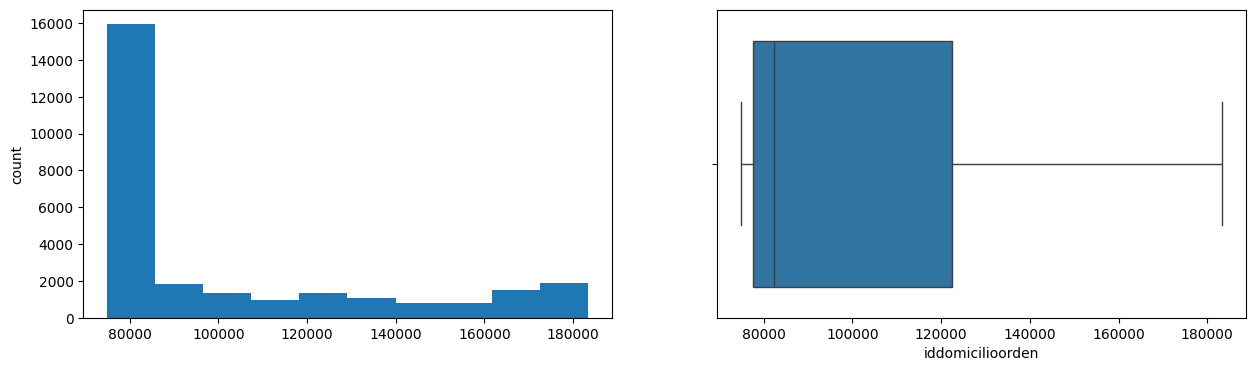

InicioHorario1
Skew : -165.78


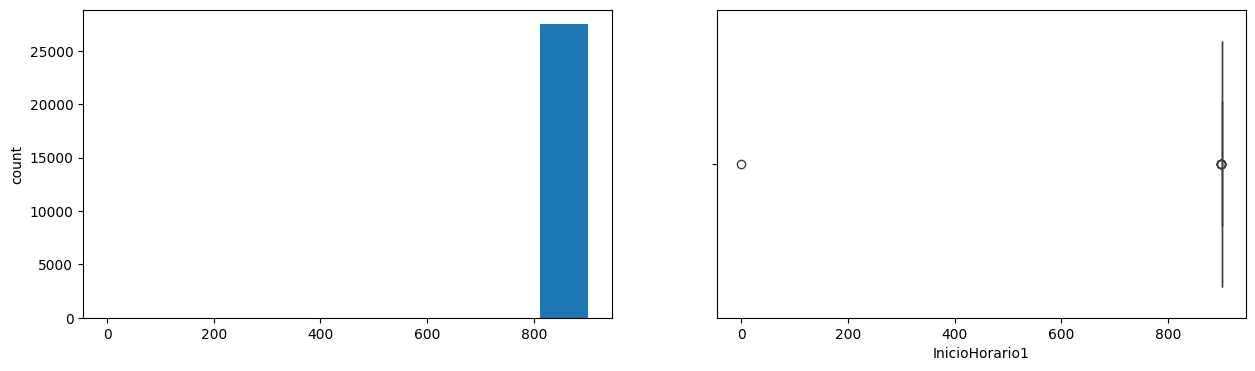

FinHorario1
Skew : 165.78


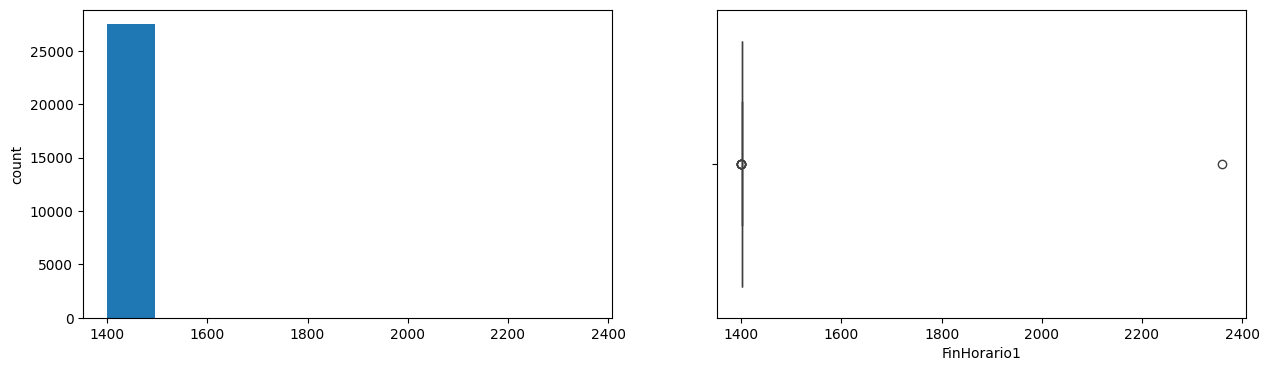

latitud
Skew : 112.83


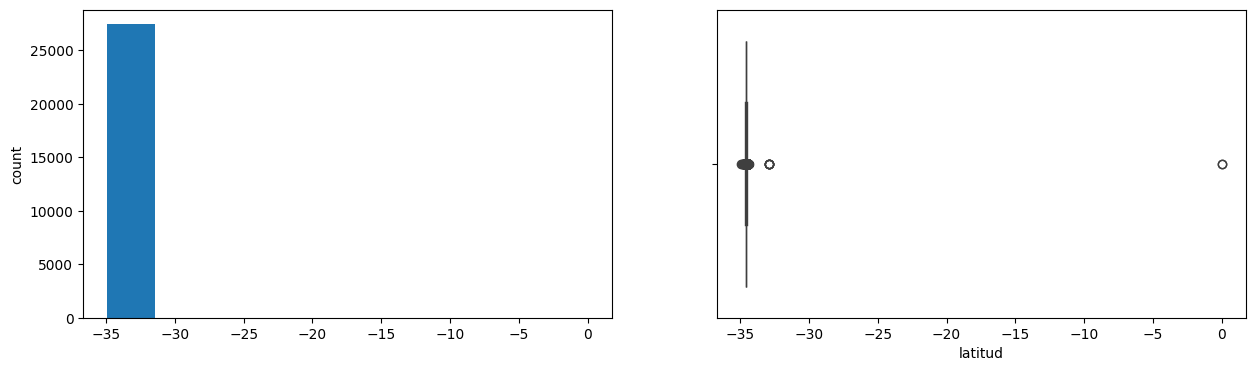

longitud
Skew : 99.55


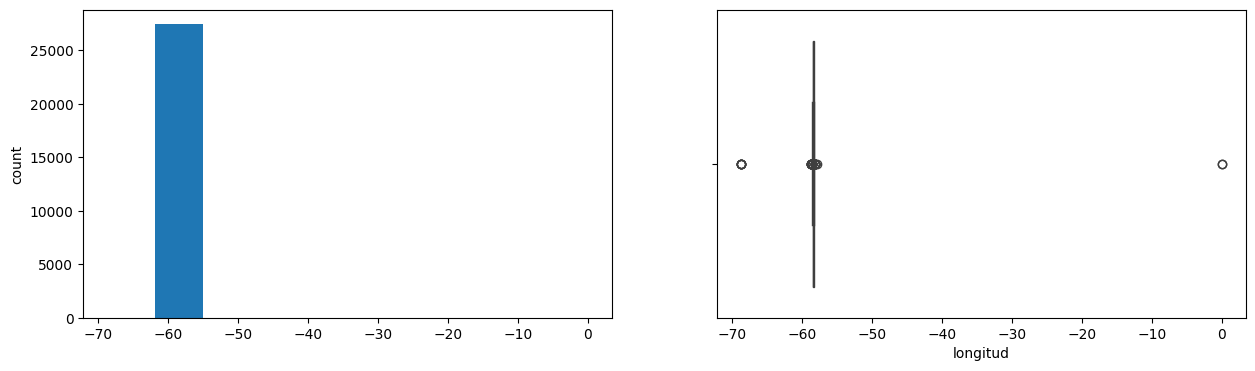

cliente
Skew : 0.43


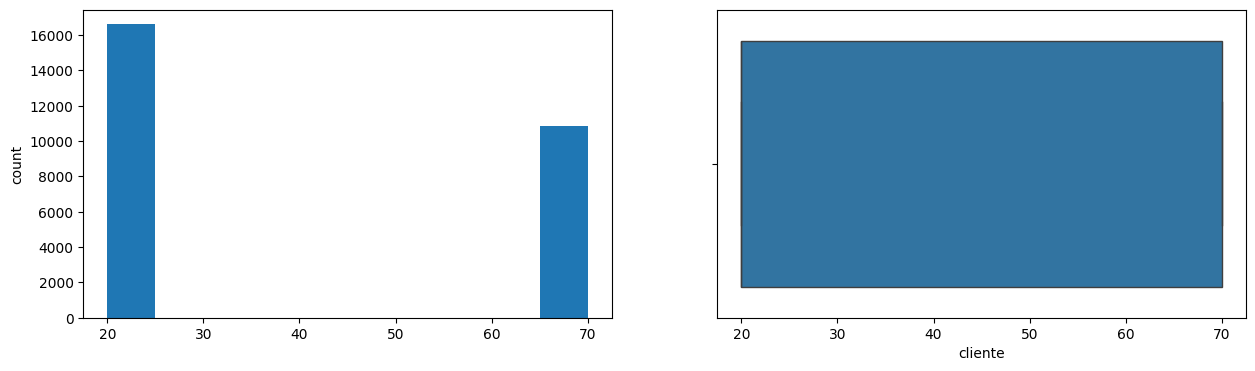

mes
Skew : -0.04


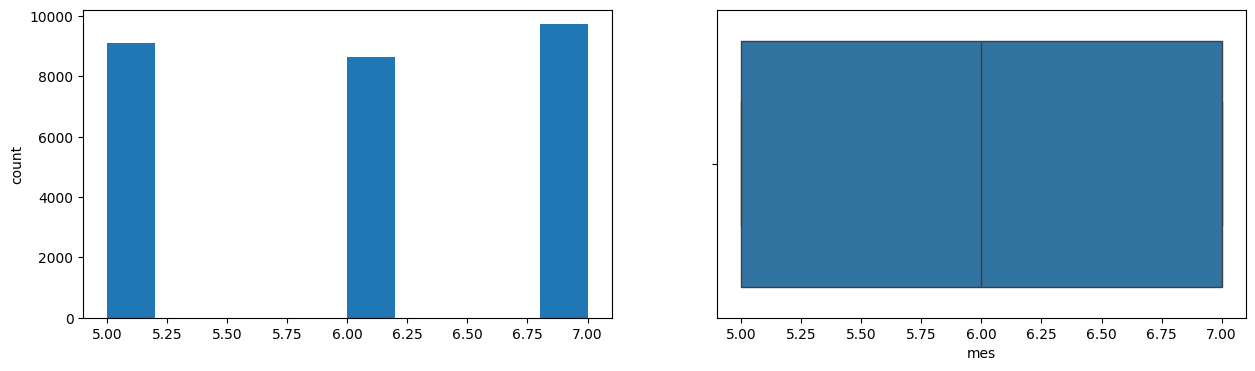

Bultos
Skew : 12.56


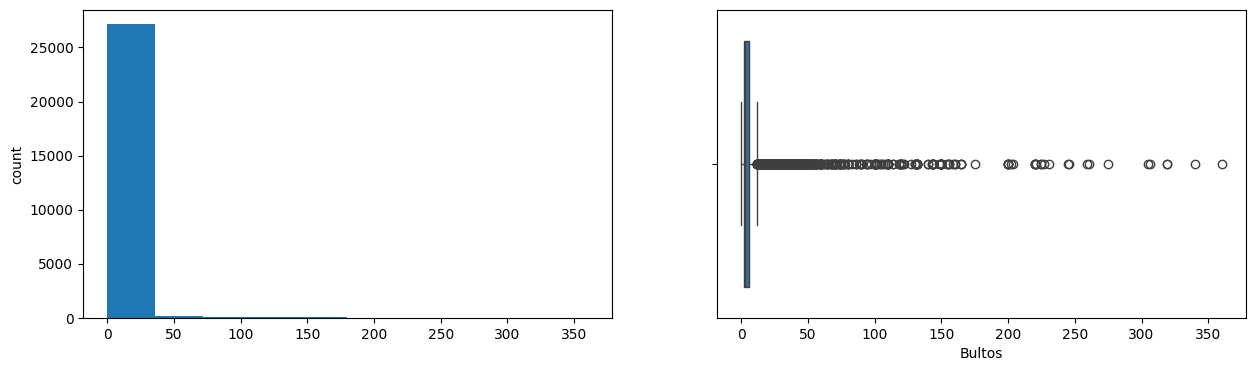

Peso
Skew : 11.85


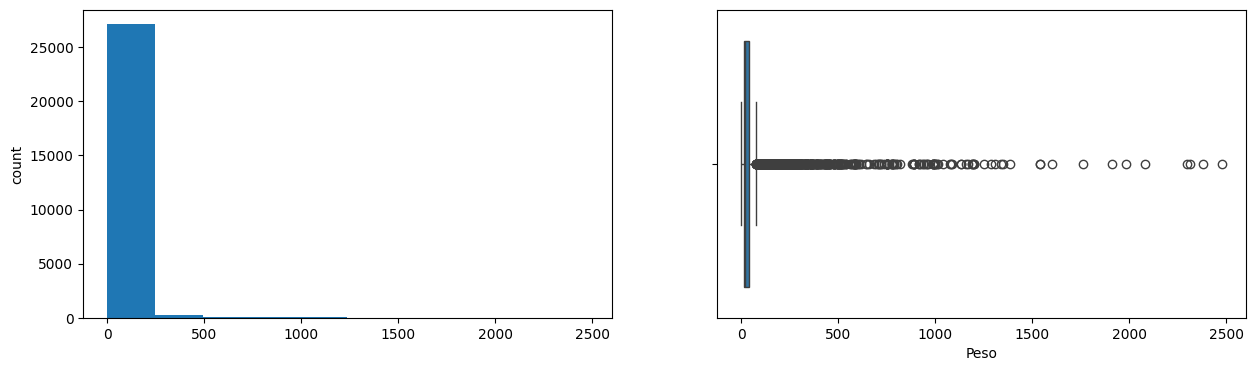

Unidades
Skew : 11.03


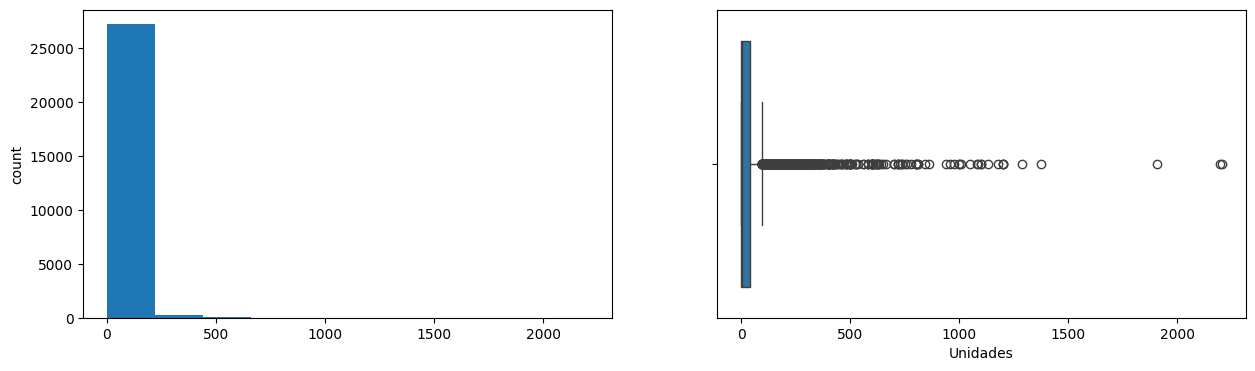

In [16]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [17]:
cat_cols

Index(['direccion', 'localidad', 'InicioVisitaPlanificado',
       'FinVisitaPlanificado', 'InicioVisitaReal', 'FinVisitaReal'],
      dtype='object')

In [18]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 18))
# fig.suptitle('Bar plot for all categorical variables in the dataset')

# # Plots para las columnas especificadas
# sns.countplot(ax=axes[0, 0], x='direccion', data=data, color='blue', 
#               order=data['direccion'].value_counts().index)
# sns.countplot(ax=axes[0, 1], x='localidad', data=data, color='blue', 
#               order=data['localidad'].value_counts().index)
# sns.countplot(ax=axes[1, 0], x='InicioVisitaPlanificado', data=data, color='blue', 
#               order=data['InicioVisitaPlanificado'].value_counts().index)
# sns.countplot(ax=axes[1, 1], x='FinVisitaPlanificado', data=data, color='blue', 
#               order=data['FinVisitaPlanificado'].value_counts().index)
# sns.countplot(ax=axes[2, 0], x='InicioVisitaReal', data=data, color='blue', 
#               order=data['InicioVisitaReal'].value_counts().index)
# sns.countplot(ax=axes[2, 1], x='FinVisitaReal', data=data, color='blue', 
#               order=data['FinVisitaReal'].value_counts().index)

# # Ajustes para las etiquetas
# axes[1][1].tick_params(labelrotation=45)
# axes[2][0].tick_params(labelrotation=90)
# axes[2][1].tick_params(labelrotation=90)


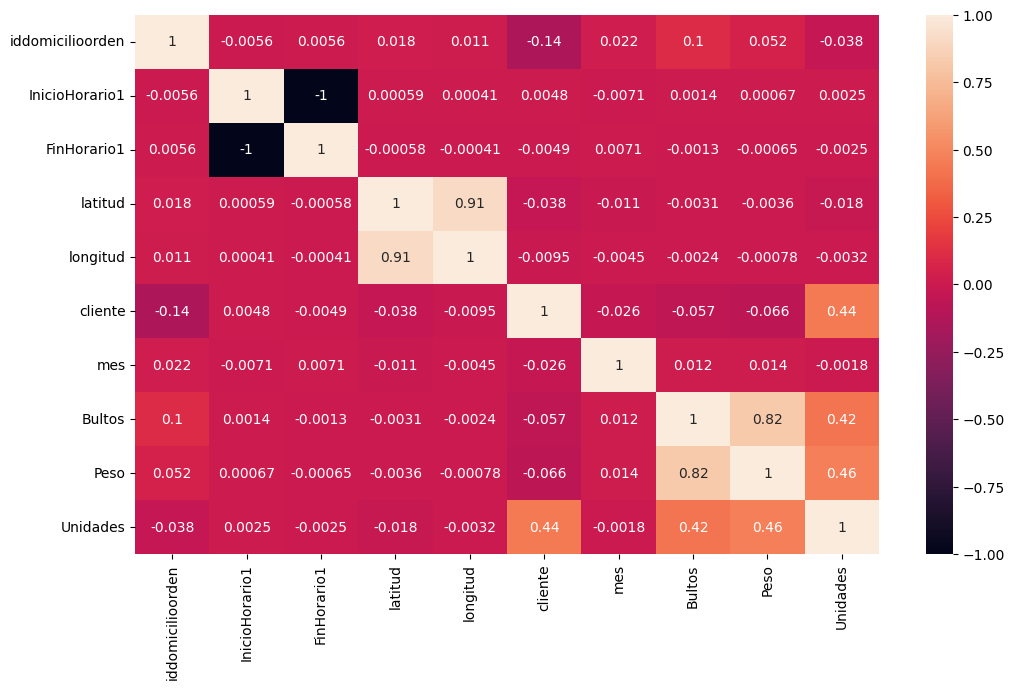

In [27]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

<Figure size 1300x1700 with 0 Axes>

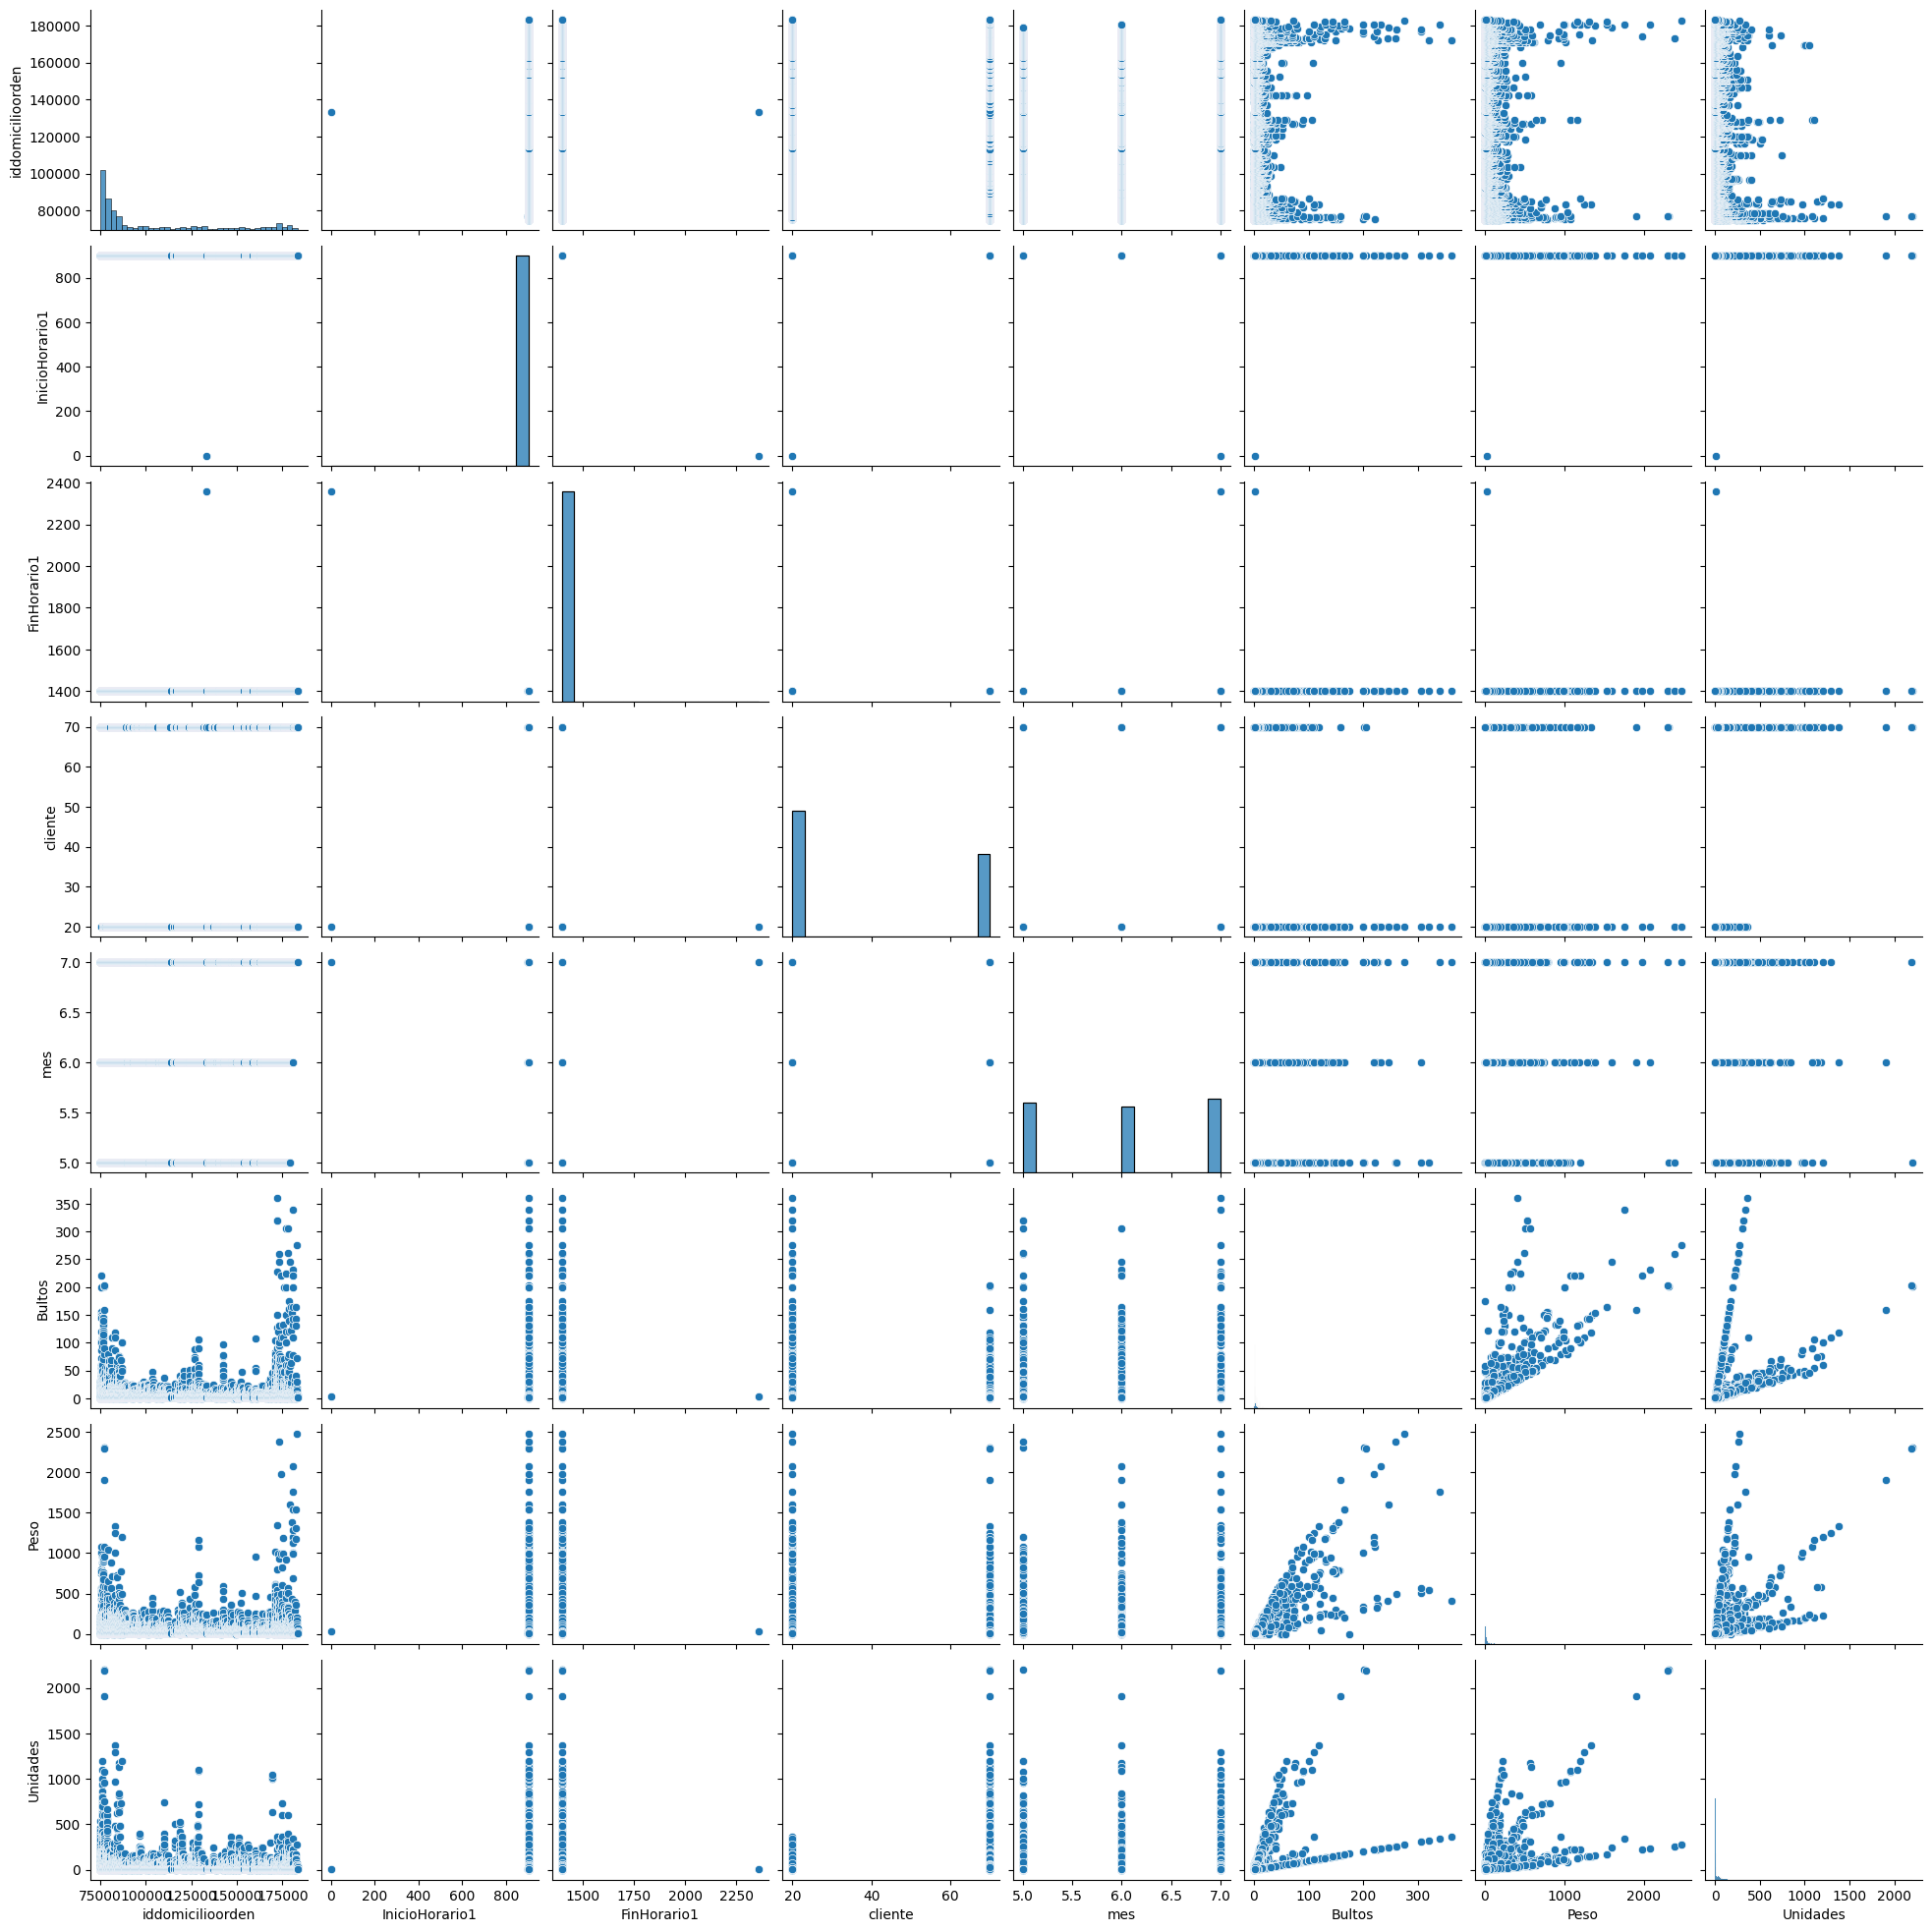

In [20]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['latitud','longitud'],axis=1))
plt.show()

## Valores iguales a 0 en coordenadas

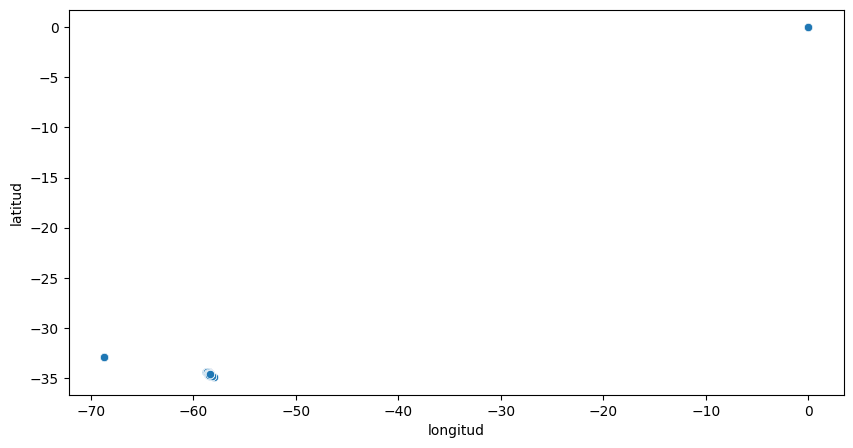

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='longitud', y='latitud', data=data)
plt.show()

Observaciones donde la longitud (y latitud) es igual a 0

In [32]:
data[data['longitud'] == 0]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24290,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,901,1401,0.0,0.0,20,5,2.0,13.0,2,2024-05-28 12:08:00.000,2024-05-28 12:08:00.000,2024-05-28 15:34:13.000,2024-05-28 15:35:13.000
25794,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,0.0,0.0,20,5,4.0,0.0,4,2024-05-28 12:01:00.000,2024-05-28 12:01:00.000,2024-05-28 16:08:00.000,2024-05-28 16:08:00.000


Existen registros distintos del mismo domicilio con los datos cargados correctamente

In [33]:
data[data['iddomicilioorden'] == 163957]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24290,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,901,1401,0.000000,0.000000,20,5,2.0,13.0,2,2024-05-28 12:08:00.000,2024-05-28 12:08:00.000,2024-05-28 15:34:13.000,2024-05-28 15:35:13.000
24291,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,901,1401,-34.628195,-58.370877,20,7,3.0,19.5,3,2024-07-02 12:07:00.000,2024-07-02 12:07:00.000,2024-07-02 14:40:16.000,2024-07-02 14:44:40.000


In [34]:
data[data['iddomicilioorden'] == 173085]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
25793,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,5,5.0,5.0,5,2024-05-30 15:54:00.000,2024-05-30 15:54:00.000,2024-05-30 17:22:00.000,2024-05-30 17:22:00.000
25794,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,0.000000,0.00000,20,5,4.0,0.0,4,2024-05-28 12:01:00.000,2024-05-28 12:01:00.000,2024-05-28 16:08:00.000,2024-05-28 16:08:00.000
25795,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,5,5.0,5.0,5,2024-06-11 14:08:00.000,2024-06-11 14:08:00.000,NaN,NaN
25796,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,5,5.0,5.0,5,2024-06-04 13:58:00.000,2024-06-04 13:58:00.000,2024-06-04 11:14:00.000,2024-06-04 11:14:00.000
25797,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,5,5.0,5.0,5,2024-06-03 13:44:00.000,2024-06-03 13:44:00.000,NaN,NaN
25798,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,5,5.0,5.0,5,2024-06-10 12:01:00.000,2024-06-10 12:01:00.000,NaN,NaN
25799,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,6,4.0,4.0,4,2024-06-06 15:24:00.000,2024-06-06 15:24:00.000,2024-06-06 16:27:00.000,2024-06-06 16:27:00.000
25800,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,6,6.0,4.0,6,2024-06-14 12:01:00.000,2024-06-14 12:01:00.000,2024-06-14 15:58:00.000,2024-06-14 15:58:00.000
25801,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,901,1401,-34.463951,-58.61268,20,7,5.0,0.0,5,2024-07-11 12:51:00.000,2024-07-11 12:51:00.000,2024-07-11 13:03:10.000,2024-07-11 13:13:41.000


In [35]:
# Existe algun caso donde la visita planificada sea igual a la real?
data[data['InicioVisitaPlanificado'] == data['InicioVisitaReal']]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal


In [37]:
# Casos donde se entrego antes de lo esperado = 
data[data['InicioVisitaPlanificado'] > data['InicioVisitaReal']] 
# 5329 rows × 16 columns

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
15,74960,FRANCISCO BEIRO 3834,CAPITAL,901,1401,-34.602701,-58.506539,70,5,3.250000,23.370,7,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 11:18:50.000,2024-05-30 11:21:50.000
34,74962,PICO 1848,CAPITAL,901,1401,-34.537919,-58.468746,70,7,2.000000,18.960,8,2024-08-01 12:04:00.000,2024-08-01 12:04:00.000,2024-08-01 11:23:06.000,2024-08-01 11:41:29.000
47,74967,CHIVILICOY 3154 0,CAPITAL,901,1401,-34.605043,-58.507253,70,5,4.966666,39.375,60,2024-05-20 12:08:00.000,2024-05-20 12:08:00.000,2024-05-20 11:46:22.000,2024-05-20 11:59:44.000
67,74974,AV LARRAZABAL 804,CAPITAL FEDERAL,901,1401,-34.646917,-58.507466,70,5,2.000000,15.000,2,2024-05-10 12:42:00.000,2024-05-10 12:42:00.000,2024-05-10 09:28:20.000,2024-05-10 09:31:55.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27474,183135,CERRITO 508,CAPITAL FEDERAL,901,1401,-34.602505,-58.382189,20,7,2.000000,11.900,2,2024-07-31 12:01:00.000,2024-07-31 12:01:00.000,2024-07-31 10:31:25.000,2024-07-31 10:37:44.000
27477,183138,BUANESS 2635,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,2.000000,10.800,2,2024-08-01 13:03:00.000,2024-08-01 13:03:00.000,2024-08-01 12:01:21.000,2024-08-01 12:03:21.000
27478,183139,C. DE LA PAZ 2701,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,3.000000,15.000,3,2024-08-01 12:10:00.000,2024-08-01 12:10:00.000,2024-08-01 10:37:07.000,2024-08-01 10:56:46.000
27480,183141,ARENALES 2699,CAPITAL FEDERAL,901,1401,-34.592476,-58.404052,20,7,2.000000,13.000,2,2024-07-31 12:30:00.000,2024-07-31 12:30:00.000,2024-07-31 12:24:53.000,2024-07-31 12:25:53.000


In [38]:
data[data['InicioVisitaPlanificado'] < data['InicioVisitaReal']]
# 22103 rows × 16 columns

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000
5,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,7,1.816667,13.777,25,2024-07-11 12:16:00.000,2024-07-11 12:16:00.000,2024-07-11 13:42:11.000,2024-07-11 13:50:31.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,183136,AV. CORRIENTES 1958,CAPITAL FEDERAL,901,1401,-34.604556,-58.394673,20,7,6.000000,71.500,6,2024-07-31 12:40:00.000,2024-07-31 12:40:00.000,2024-07-31 16:12:00.000,2024-07-31 16:12:00.000
27476,183137,TUCUMAN 1787,CAPITAL FEDERAL,901,1401,-34.601904,-58.392440,20,7,3.000000,32.500,3,2024-07-31 12:33:00.000,2024-07-31 12:33:00.000,2024-07-31 16:12:00.000,2024-07-31 16:12:00.000
27479,183140,CASTILLO 767,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,2.000000,10.800,2,2024-08-01 12:52:00.000,2024-08-01 12:52:00.000,2024-08-01 15:51:49.000,2024-08-01 15:56:37.000
27481,183274,OLAZABAL 2572,CAPITAL,901,1401,-34.561181,-58.459866,70,7,2.150000,8.243,29,2024-08-01 12:10:00.000,2024-08-01 12:10:00.000,2024-08-01 13:09:13.000,2024-08-01 13:22:13.000


## Feature Engineering

In [41]:
data['entrega_diff_minutes'] = (pd.to_datetime(data['InicioVisitaPlanificado']) - pd.to_datetime(data['InicioVisitaReal'])).dt.total_seconds() / 60

In [47]:
data.describe().T
# Min: 7161min de anticipación
# Max: 7000min de anticipación, aprox 5 días

,count,mean,std,min,25%,50%,75%,max
iddomicilioorden,27484.0,101860.162422,33957.944874,74956.000000,77468.000000,82380.000000,122555.000000,183277.0
InicioHorario1,27484.0,900.966999,5.434834,0.000000,901.000000,901.000000,901.000000,901.0
FinHorario1,27484.0,1401.034638,5.778659,1400.000000,1401.000000,1401.000000,1401.000000,2359.0
latitud,27443.0,-34.592296,0.299066,-34.928194,-34.619761,-34.600199,-34.581161,0.0
longitud,27443.0,-58.438764,0.523811,-68.743920,-58.475619,-58.437372,-58.402952,0.0
cliente,27484.0,39.793334,24.452247,20.000000,20.000000,20.000000,70.000000,70.0
mes,27484.0,6.022013,0.827731,5.000000,5.000000,6.000000,7.000000,7.0
Bultos,27484.0,5.760681,12.234991,0.100000,2.000000,3.000000,6.000000,360.0
Peso,27484.0,41.134233,79.073882,0.000000,13.000000,20.919500,39.000000,2475.0
Unidades,27484.0,28.366650,61.753592,1.000000,2.000000,6.000000,40.000000,2203.0


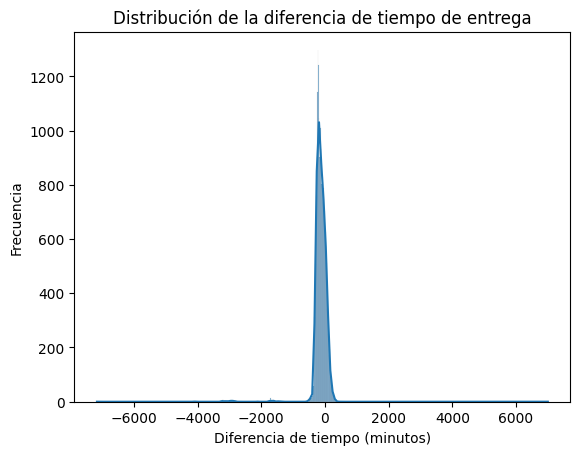

In [42]:
sns.histplot(data['entrega_diff_minutes'], kde=True)
plt.title('Distribución de la diferencia de tiempo de entrega')
plt.xlabel('Diferencia de tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.show()

In [48]:
data[data['entrega_diff_minutes'] == 7000]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,entrega_diff_minutes
17920,97145,AGÜERO 571,CAPITAL FEDERAL,901,1401,-34.603249,-58.411436,20,6,15.0,195.0,15,2024-07-07 12:01:00.000,2024-07-07 12:01:00.000,2024-07-02 15:21:00.000,2024-07-02 15:21:00.000,7000.0


In [49]:
# En 10251 observaciones, el horario de inicio y finalizacion de entrega es el mismo.
data[data['InicioVisitaReal'] == data['FinVisitaReal']]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,entrega_diff_minutes
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,-278.0
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,-189.0
7,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,7,2.825000,27.955,40,2024-07-22 12:14:00.000,2024-07-22 12:14:00.000,2024-07-22 15:07:00.000,2024-07-22 15:07:00.000,-173.0
8,74958,M PEDRAZA 2370,CAPITAL,901,1401,-34.551154,-58.465986,70,5,3.400000,30.120,42,2024-05-20 12:09:00.000,2024-05-20 12:09:00.000,2024-05-20 14:33:00.000,2024-05-20 14:33:00.000,-144.0
11,74958,M PEDRAZA 2370,CAPITAL,901,1401,-34.551154,-58.465986,70,6,3.366666,17.550,50,2024-06-18 12:15:00.000,2024-06-18 12:15:00.000,2024-06-18 15:41:00.000,2024-06-18 15:41:00.000,-206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27469,183032,jose barros pasos 2938/3000,CAPITAL FEDERAL,901,1401,-34.789383,-58.145953,20,7,30.000000,90.000,30,2024-08-06 12:01:00.000,2024-08-06 12:01:00.000,2024-08-06 16:57:00.000,2024-08-06 16:57:00.000,-296.0
27470,183037,CARHUE 851,CAPITAL,901,1401,-34.648114,-58.524392,70,7,3.300000,20.000,46,2024-07-31 12:35:00.000,2024-07-31 12:35:00.000,2024-07-31 16:58:00.000,2024-07-31 16:58:00.000,-263.0
27471,183037,CARHUE 851,CAPITAL,901,1401,-34.648114,-58.524392,70,7,3.300000,20.330,46,2024-07-30 12:32:00.000,2024-07-30 12:32:00.000,2024-07-30 17:40:00.000,2024-07-30 17:40:00.000,-308.0
27475,183136,AV. CORRIENTES 1958,CAPITAL FEDERAL,901,1401,-34.604556,-58.394673,20,7,6.000000,71.500,6,2024-07-31 12:40:00.000,2024-07-31 12:40:00.000,2024-07-31 16:12:00.000,2024-07-31 16:12:00.000,-212.0


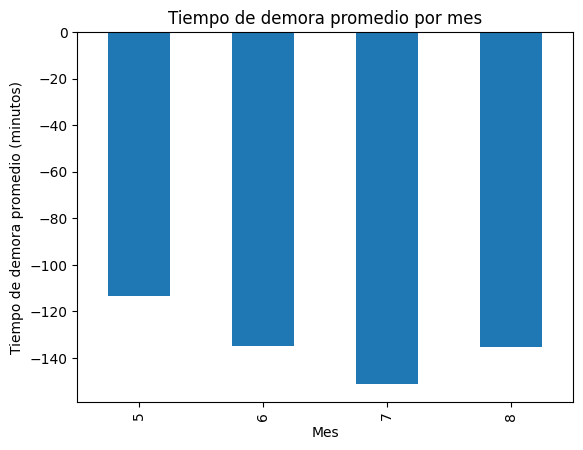

In [51]:
data['InicioVisitaPlanificado'] = pd.to_datetime(data['InicioVisitaPlanificado'])
data.groupby(data['InicioVisitaPlanificado'].dt.month)['entrega_diff_minutes'].mean().plot(kind='bar')
plt.title('Tiempo de demora promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Tiempo de demora promedio (minutos)')
plt.show()

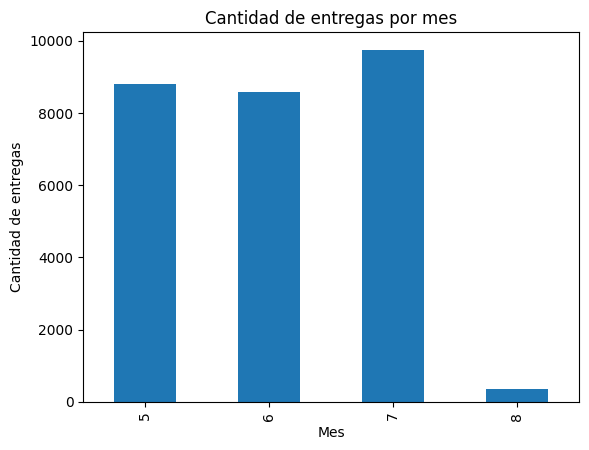

In [52]:
data.groupby(data['InicioVisitaPlanificado'].dt.month)['iddomicilioorden'].count().plot(kind='bar')
plt.title('Cantidad de entregas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de entregas')
plt.show()

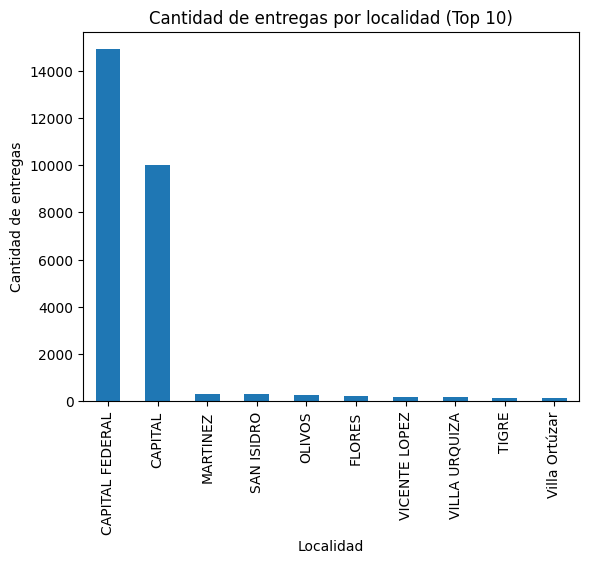

In [56]:
data.groupby('localidad')['iddomicilioorden'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Cantidad de entregas por localidad (Top 10)')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de entregas')
plt.show()

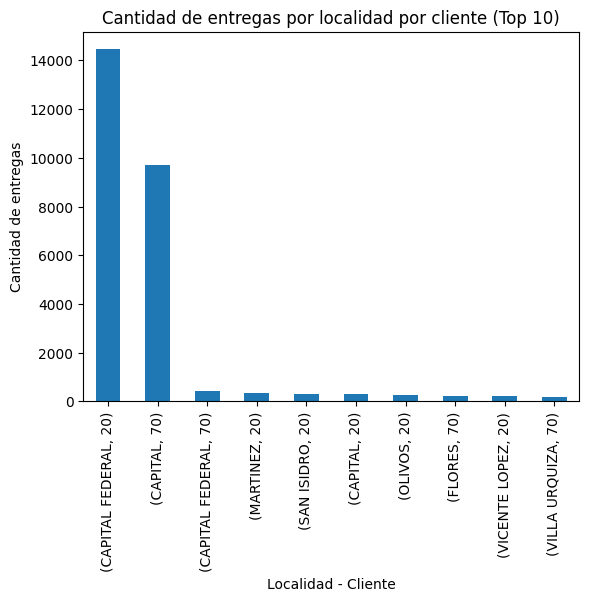

In [59]:
data.groupby(['localidad', 'cliente'])['iddomicilioorden'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Cantidad de entregas por localidad por cliente (Top 10)')
plt.xlabel('Localidad - Cliente')
plt.ylabel('Cantidad de entregas')
plt.show()

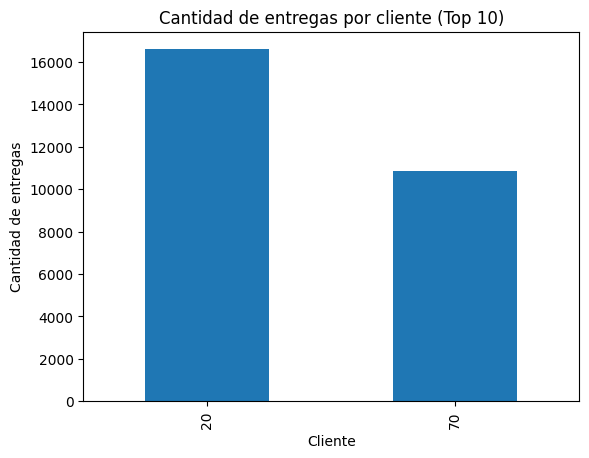

In [60]:
data.groupby('cliente')['iddomicilioorden'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Cantidad de entregas por cliente (Top 10)')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de entregas')
plt.show()